In [1]:
import cv2
import numpy as numpy
import os
import nibabel as nib   
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi

In [2]:
imt_logo=np.zeros((8,16))
imt_logo[0,:]=[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]
imt_logo[1,:]=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
imt_logo[2,:]=[1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,0]
imt_logo[3,:]=[0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1]
imt_logo[4,:]=[1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0]
imt_logo[5,:]=[0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,1]
imt_logo[6,:]=[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
imt_logo[7,:]=[0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]

[0 1 2 4]


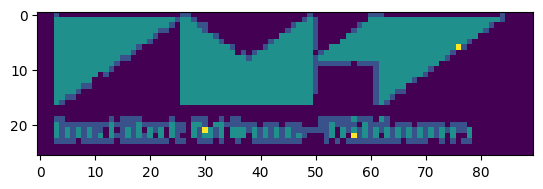

In [3]:
import numpy as np
def resize_matrix(matrix):
    rows, cols = matrix.shape
    new_rows = rows * 2
    new_cols = cols * 2
    resized_matrix = np.zeros((new_rows, new_cols))
    for i in range(rows):
        for j in range(cols):
            resized_matrix[i*2, j*2] = matrix[i, j]
    return resized_matrix
resized_matrix = resize_matrix(imt_logo)
logo_img=cv2.imread('photos/imt_logo.jpg',0)
logo_img=cv2.resize(logo_img,(128,64))
logo_img=logo_img.astype(np.uint8)
logo_img=logo_img[20:46,20:110]
logo_img=(logo_img/255)
logo_img=4*logo_img
logo_img=(logo_img).astype(int)
logo_img=4-logo_img
logo_img[logo_img==3]=4
plt.imshow(logo_img)
print(np.unique(logo_img))
def seg_embedder(start_cor,logo_img,data_array,logo_bit,method=0,thickness=5):
    new_data=np.copy(data_array)
    if method==0:
        h,w=logo_img.shape
        for t in range(thickness):
            new_data[start_cor[0]:start_cor[0]+h,start_cor[1]:start_cor[1]+w,70+t]=logo_img
    else:
        h,w=logo_bit.shape
        new_data[start_cor[0]:start_cor[0]+h,start_cor[1]:start_cor[1]+w,70+t]=logo_bit
    
    return new_data
bit_message=np.zeros((16,32))
bit_message=resized_matrix
bit_message[4:12,8:24]=2*imt_logo


In [4]:
def detect_high_value_pixels(image_array, threshold=0.1):
    height, width = image_array.shape
    result_array = np.zeros_like(image_array)

    # Iterate through each pixel in the image
    for y in range(height):
        for x in range(width):
            # Check the 9x9 neighborhood around the current pixel
            neighborhood = image_array[max(0, y-6):min(height, y+7), max(0, x-6):min(width, x+7)]
            # Calculate the mean of the neighborhood
            neighborhood_mean = np.mean(neighborhood)
            # If the mean is below the threshold, assign a high value to the result array
            if neighborhood_mean < threshold:
                result_array[y, x] = 0.5
    result_array=(result_array*255).astype(np.uint8)

    return result_array
def spacefill(data_array):
    new_data_array=np.zeros(data_array.shape)
    xmax,ymax,time=data_array.shape
    for t in range(time):
        new_data_array[:,:,t]=detect_high_value_pixels(data_array[:,:,t])+data_array[:,:,t]
    return new_data_array

[0. 1. 2. 4.]
here
Folder created successfully.
done
[0. 1. 2. 4.]
here
Folder created successfully.
done
[0. 1. 2. 4.]
here
Folder created successfully.
done
[0. 1. 2. 4.]
here
Folder created successfully.
done
[0. 1. 2. 4.]
here
Folder created successfully.
done
[0. 1. 2. 4.]
here
Folder created successfully.
done
[0. 1. 2. 4.]
here
Folder created successfully.
done
[0. 1. 2. 4.]
here
Folder created successfully.
done
[0. 1. 2. 4.]
here
Folder created successfully.
done
[0. 1. 2. 4.]
here
Folder created successfully.
done


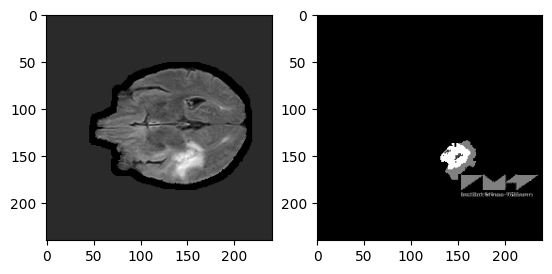

In [5]:

initial_path="C:\\Users\\arifa\\OneDrive\\Bureau\\BRATS_dataset\\BraTS2020_TrainingData\\MICCAI_BraTS2020_TrainingData\\"
spc_path="C:\\Users\\arifa\\OneDrive\\Bureau\\BRATS_dataset\\BraTS2020_TrainingData\\MICCAI_BraTS2020_SPCTrainingData\\"
for i in range(1,11):
    j=np.random.randint(1,369)
    more_path="BraTS20_Training_"+str(1000+j)[-3:]
    img_flair=nib.load(initial_path+more_path+"\\"+more_path+"_flair.nii")
    img_seg=nib.load(initial_path+more_path+"\\"+more_path+"_seg.nii")
    image_t1=nib.load(initial_path+more_path+"\\"+more_path+"_t1.nii")
    image_t1ce=nib.load(initial_path+more_path+"\\"+more_path+"_t1ce.nii")
    image_t2=nib.load(initial_path+more_path+"\\"+more_path+"_t2.nii")
    data_flair=img_flair.get_fdata()
    data_seg=img_seg.get_fdata()
    print(np.unique(data_seg))
    data_t1=image_t1.get_fdata()
    data_t1ce=image_t1ce.get_fdata()
    data_t2=image_t2.get_fdata()
    new_seg=embedded_segs=seg_embedder([170,150],logo_img,data_seg,bit_message,method=0)
    new_flair=spacefill(data_flair)
    print("here")
    new_t1=spacefill(data_t1)
    new_t1ce=spacefill(data_t1ce)
    new_t2=spacefill(data_t2)
    more_path="BraTS20_Training_"+str(1000+i)[-3:]
    if not os.path.exists(spc_path+more_path+"\\"):
    # Create the folder if it doesn't exist
        os.makedirs(spc_path+more_path+"\\")
    print("Folder created successfully.")

    new_img_flair = nib.Nifti1Image(new_flair,affine=np.eye(4))
    nib.save(new_img_flair,spc_path+more_path+"\\"+more_path+"_flair.nii")
    
    new_img_seg = nib.Nifti1Image(new_seg,affine=np.eye(4))
    nib.save(new_img_seg,spc_path+more_path+"\\"+more_path+"_seg.nii")

    new_img_t1 = nib.Nifti1Image(new_t1,affine=np.eye(4))
    nib.save(new_img_t1,spc_path+more_path+"\\"+more_path+"_t1.nii")

    new_img_t1ce = nib.Nifti1Image(new_t1ce,affine=np.eye(4))
    nib.save(new_img_t1ce,spc_path+more_path+"\\"+more_path+"_t1ce.nii")

    new_img_t2 = nib.Nifti1Image(new_t2,affine=np.eye(4))
    nib.save(new_img_t2,spc_path+more_path+"\\"+more_path+"_t2.nii")
    print("done")
    

plt.figure()
plt.subplot(1,2,1)
plt.imshow(new_flair[:,:,70],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(new_seg[:,:,72],cmap='gray')
